### Jimmy Kalyviaris, Ames Wang
## Wrangling Final Project 

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 



## Load in both csv files 


In [4]:
nba2020_stats = pd.read_csv('nba2020_stats.csv', sep=',')

In [5]:
nba2020_stats = pd.DataFrame(nba2020_stats)

In [6]:
nba2020_stats.head()

,player,age,team,position,ppg,assists_per_game,rebounds_per_game,min_per_game
0,James Harden,30.0,HOU,SG,34.3,7.5,6.6,36.5
1,Bradley Beal,26.0,WAS,SG,30.5,6.1,4.2,36.0
2,Damian Lillard,29.0,POR,PG,30.0,8.0,4.3,37.5
3,Trae Young,21.0,ATL,PG,29.6,9.3,4.3,35.3
4,Giannis Antetokounmpo,25.0,MIL,PF,29.5,5.6,13.6,30.4


In [7]:
nba2k20_stats = pd.read_csv('nba2k20_data_edited.csv', sep=',')

In [8]:
nba2k20_stats = pd.DataFrame(nba2k20_stats)

In [9]:
nba2k20_stats

,Unnamed: 0,full_name,rating,team,position,height,weight,salary
0,0,LeBron James,97,Los Angeles Lakers,F,81,250,$37436858
1,1,Kawhi Leonard,97,Los Angeles Clippers,F,79,225,$32742000
2,2,Giannis Antetokounmpo,96,Milwaukee Bucks,F-G,83,242,$25842697
3,3,Kevin Durant,96,Brooklyn Nets,F,82,230,$37199000
4,4,James Harden,96,Houston Rockets,G,77,220,$38199000
...,...,...,...,...,...,...,...,...
459,459,Chris Paul,88,Oklahoma City Thunder,G,73,175,$41358814
460,460,Bradley Beal,88,Washington Wizards,G,75,207,$28751774
461,461,Rudy Gobert,87,Utah Jazz,C,85,238,$27525281
462,462,Kyle Lowry,87,Toronto Raptors,G,72,205,$30500000


In [10]:
nba2k20_stats= nba2k20_stats.rename(columns={'full_name': 'player'})

## Merge the two data frames on the name of the player

In [12]:
total_2020_stats= pd.merge(nba2020_stats, nba2k20_stats, on='player', how='outer')


In [13]:
total_2020_stats

,player,age,team_x,position_x,ppg,assists_per_game,rebounds_per_game,min_per_game,Unnamed: 0,rating,team_y,position_y,height,weight,salary
0,Aaron Gordon,24.0,ORL,PF,14.4,3.7,7.7,32.5,74.0,81.0,Orlando Magic,F,80.0,220.0,$19863636
1,Aaron Holiday,23.0,IND,PG,9.5,3.4,2.4,24.5,288.0,73.0,Indiana Pacers,G,72.0,185.0,$2239200
2,Abdel Nader,26.0,OKC,SF,6.3,0.7,1.8,15.8,397.0,70.0,Oklahoma City Thunder,F,77.0,225.0,$1618520
3,Adam Mokoka,21.0,CHI,SF,2.9,0.4,0.9,10.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Admiral Schofield,22.0,WAS,PF,3.0,0.5,1.4,11.2,378.0,71.0,Washington Wizards,F,77.0,241.0,$1000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,Zach Norvell,22.0,LAL,SG,0.0,0.0,0.5,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761,Zach Norvell,22.0,GSW,SG,3.3,1.0,1.7,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762,Zhaire Smith,20.0,PHI,SF,1.1,0.3,0.3,4.6,338.0,72.0,Philadelphia 76ers,G-F,75.0,205.0,$3058800
763,Zion Williamson,19.0,NOP,PF,22.5,2.1,6.3,27.8,72.0,81.0,New Orleans Pelicans,F,78.0,284.0,$9757440


In [14]:
total_2020_stats=total_2020_stats.dropna()

In [15]:
total_2020_stats


,player,age,team_x,position_x,ppg,assists_per_game,rebounds_per_game,min_per_game,Unnamed: 0,rating,team_y,position_y,height,weight,salary
0,Aaron Gordon,24.0,ORL,PF,14.4,3.7,7.7,32.5,74.0,81.0,Orlando Magic,F,80.0,220.0,$19863636
1,Aaron Holiday,23.0,IND,PG,9.5,3.4,2.4,24.5,288.0,73.0,Indiana Pacers,G,72.0,185.0,$2239200
2,Abdel Nader,26.0,OKC,SF,6.3,0.7,1.8,15.8,397.0,70.0,Oklahoma City Thunder,F,77.0,225.0,$1618520
4,Admiral Schofield,22.0,WAS,PF,3.0,0.5,1.4,11.2,378.0,71.0,Washington Wizards,F,77.0,241.0,$1000000
5,Al Horford,33.0,PHI,C,11.9,4.0,6.8,30.2,44.0,85.0,Philadelphia 76ers,C-F,81.0,246.0,$28000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Yogi Ferrell,26.0,SAC,PG,4.4,1.4,1.0,10.6,250.0,74.0,Sacramento Kings,G,72.0,178.0,$3150000
757,Zach Collins,22.0,POR,PF,7.0,1.5,6.3,26.4,244.0,74.0,Portland Trail Blazers,C,83.0,232.0,$4240200
758,Zach LaVine,24.0,CHI,SF,25.5,4.2,4.8,34.8,45.0,85.0,Chicago Bulls,G,78.0,181.0,$19500000
762,Zhaire Smith,20.0,PHI,SF,1.1,0.3,0.3,4.6,338.0,72.0,Philadelphia 76ers,G-F,75.0,205.0,$3058800


In [16]:
total_2020_stats= total_2020_stats.drop(columns='Unnamed: 0')

In [17]:
duplicates = total_2020_stats[total_2020_stats.duplicated(keep=False)]

In [18]:
duplicates

,player,age,team_x,position_x,ppg,assists_per_game,rebounds_per_game,min_per_game,rating,team_y,position_y,height,weight,salary


In [19]:
total_2020_stats

,player,age,team_x,position_x,ppg,assists_per_game,rebounds_per_game,min_per_game,rating,team_y,position_y,height,weight,salary
0,Aaron Gordon,24.0,ORL,PF,14.4,3.7,7.7,32.5,81.0,Orlando Magic,F,80.0,220.0,$19863636
1,Aaron Holiday,23.0,IND,PG,9.5,3.4,2.4,24.5,73.0,Indiana Pacers,G,72.0,185.0,$2239200
2,Abdel Nader,26.0,OKC,SF,6.3,0.7,1.8,15.8,70.0,Oklahoma City Thunder,F,77.0,225.0,$1618520
4,Admiral Schofield,22.0,WAS,PF,3.0,0.5,1.4,11.2,71.0,Washington Wizards,F,77.0,241.0,$1000000
5,Al Horford,33.0,PHI,C,11.9,4.0,6.8,30.2,85.0,Philadelphia 76ers,C-F,81.0,246.0,$28000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Yogi Ferrell,26.0,SAC,PG,4.4,1.4,1.0,10.6,74.0,Sacramento Kings,G,72.0,178.0,$3150000
757,Zach Collins,22.0,POR,PF,7.0,1.5,6.3,26.4,74.0,Portland Trail Blazers,C,83.0,232.0,$4240200
758,Zach LaVine,24.0,CHI,SF,25.5,4.2,4.8,34.8,85.0,Chicago Bulls,G,78.0,181.0,$19500000
762,Zhaire Smith,20.0,PHI,SF,1.1,0.3,0.3,4.6,72.0,Philadelphia 76ers,G-F,75.0,205.0,$3058800


In [20]:
total_2020_stats=total_2020_stats.drop(columns='team_x')

In [21]:
total_2020_stats= total_2020_stats.drop(columns='position_x')

In [22]:
total_2020_stats

,player,age,ppg,assists_per_game,rebounds_per_game,min_per_game,rating,team_y,position_y,height,weight,salary
0,Aaron Gordon,24.0,14.4,3.7,7.7,32.5,81.0,Orlando Magic,F,80.0,220.0,$19863636
1,Aaron Holiday,23.0,9.5,3.4,2.4,24.5,73.0,Indiana Pacers,G,72.0,185.0,$2239200
2,Abdel Nader,26.0,6.3,0.7,1.8,15.8,70.0,Oklahoma City Thunder,F,77.0,225.0,$1618520
4,Admiral Schofield,22.0,3.0,0.5,1.4,11.2,71.0,Washington Wizards,F,77.0,241.0,$1000000
5,Al Horford,33.0,11.9,4.0,6.8,30.2,85.0,Philadelphia 76ers,C-F,81.0,246.0,$28000000
...,...,...,...,...,...,...,...,...,...,...,...,...
755,Yogi Ferrell,26.0,4.4,1.4,1.0,10.6,74.0,Sacramento Kings,G,72.0,178.0,$3150000
757,Zach Collins,22.0,7.0,1.5,6.3,26.4,74.0,Portland Trail Blazers,C,83.0,232.0,$4240200
758,Zach LaVine,24.0,25.5,4.2,4.8,34.8,85.0,Chicago Bulls,G,78.0,181.0,$19500000
762,Zhaire Smith,20.0,1.1,0.3,0.3,4.6,72.0,Philadelphia 76ers,G-F,75.0,205.0,$3058800


In [23]:
total_2020_stats = total_2020_stats.rename(columns={'team_y': 'team'})

In [24]:
total_2020_stats = total_2020_stats.rename(columns={'position_y': 'position'})

In [25]:
total_2020_stats

,player,age,ppg,assists_per_game,rebounds_per_game,min_per_game,rating,team,position,height,weight,salary
0,Aaron Gordon,24.0,14.4,3.7,7.7,32.5,81.0,Orlando Magic,F,80.0,220.0,$19863636
1,Aaron Holiday,23.0,9.5,3.4,2.4,24.5,73.0,Indiana Pacers,G,72.0,185.0,$2239200
2,Abdel Nader,26.0,6.3,0.7,1.8,15.8,70.0,Oklahoma City Thunder,F,77.0,225.0,$1618520
4,Admiral Schofield,22.0,3.0,0.5,1.4,11.2,71.0,Washington Wizards,F,77.0,241.0,$1000000
5,Al Horford,33.0,11.9,4.0,6.8,30.2,85.0,Philadelphia 76ers,C-F,81.0,246.0,$28000000
...,...,...,...,...,...,...,...,...,...,...,...,...
755,Yogi Ferrell,26.0,4.4,1.4,1.0,10.6,74.0,Sacramento Kings,G,72.0,178.0,$3150000
757,Zach Collins,22.0,7.0,1.5,6.3,26.4,74.0,Portland Trail Blazers,C,83.0,232.0,$4240200
758,Zach LaVine,24.0,25.5,4.2,4.8,34.8,85.0,Chicago Bulls,G,78.0,181.0,$19500000
762,Zhaire Smith,20.0,1.1,0.3,0.3,4.6,72.0,Philadelphia 76ers,G-F,75.0,205.0,$3058800


In [26]:
total_2020_stats.reset_index(inplace=True)

In [27]:
total_2020_stats

,index,player,age,ppg,assists_per_game,rebounds_per_game,min_per_game,rating,team,position,height,weight,salary
0,0,Aaron Gordon,24.0,14.4,3.7,7.7,32.5,81.0,Orlando Magic,F,80.0,220.0,$19863636
1,1,Aaron Holiday,23.0,9.5,3.4,2.4,24.5,73.0,Indiana Pacers,G,72.0,185.0,$2239200
2,2,Abdel Nader,26.0,6.3,0.7,1.8,15.8,70.0,Oklahoma City Thunder,F,77.0,225.0,$1618520
3,4,Admiral Schofield,22.0,3.0,0.5,1.4,11.2,71.0,Washington Wizards,F,77.0,241.0,$1000000
4,5,Al Horford,33.0,11.9,4.0,6.8,30.2,85.0,Philadelphia 76ers,C-F,81.0,246.0,$28000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,755,Yogi Ferrell,26.0,4.4,1.4,1.0,10.6,74.0,Sacramento Kings,G,72.0,178.0,$3150000
455,757,Zach Collins,22.0,7.0,1.5,6.3,26.4,74.0,Portland Trail Blazers,C,83.0,232.0,$4240200
456,758,Zach LaVine,24.0,25.5,4.2,4.8,34.8,85.0,Chicago Bulls,G,78.0,181.0,$19500000
457,762,Zhaire Smith,20.0,1.1,0.3,0.3,4.6,72.0,Philadelphia 76ers,G-F,75.0,205.0,$3058800


In [28]:
total_2020_stats=total_2020_stats.drop(columns='index')

In [29]:
total_2020_stats

,player,age,ppg,assists_per_game,rebounds_per_game,min_per_game,rating,team,position,height,weight,salary
0,Aaron Gordon,24.0,14.4,3.7,7.7,32.5,81.0,Orlando Magic,F,80.0,220.0,$19863636
1,Aaron Holiday,23.0,9.5,3.4,2.4,24.5,73.0,Indiana Pacers,G,72.0,185.0,$2239200
2,Abdel Nader,26.0,6.3,0.7,1.8,15.8,70.0,Oklahoma City Thunder,F,77.0,225.0,$1618520
3,Admiral Schofield,22.0,3.0,0.5,1.4,11.2,71.0,Washington Wizards,F,77.0,241.0,$1000000
4,Al Horford,33.0,11.9,4.0,6.8,30.2,85.0,Philadelphia 76ers,C-F,81.0,246.0,$28000000
...,...,...,...,...,...,...,...,...,...,...,...,...
454,Yogi Ferrell,26.0,4.4,1.4,1.0,10.6,74.0,Sacramento Kings,G,72.0,178.0,$3150000
455,Zach Collins,22.0,7.0,1.5,6.3,26.4,74.0,Portland Trail Blazers,C,83.0,232.0,$4240200
456,Zach LaVine,24.0,25.5,4.2,4.8,34.8,85.0,Chicago Bulls,G,78.0,181.0,$19500000
457,Zhaire Smith,20.0,1.1,0.3,0.3,4.6,72.0,Philadelphia 76ers,G-F,75.0,205.0,$3058800


In [30]:
total_2020_stats.dtypes

player                object
age                  float64
ppg                  float64
assists_per_game     float64
rebounds_per_game    float64
min_per_game         float64
rating               float64
team                  object
position              object
height               float64
weight               float64
salary                object
dtype: object

In [31]:
total_2020_stats['rating']= total_2020_stats['rating'].astype(int)

In [32]:
total_2020_stats

,player,age,ppg,assists_per_game,rebounds_per_game,min_per_game,rating,team,position,height,weight,salary
0,Aaron Gordon,24.0,14.4,3.7,7.7,32.5,81,Orlando Magic,F,80.0,220.0,$19863636
1,Aaron Holiday,23.0,9.5,3.4,2.4,24.5,73,Indiana Pacers,G,72.0,185.0,$2239200
2,Abdel Nader,26.0,6.3,0.7,1.8,15.8,70,Oklahoma City Thunder,F,77.0,225.0,$1618520
3,Admiral Schofield,22.0,3.0,0.5,1.4,11.2,71,Washington Wizards,F,77.0,241.0,$1000000
4,Al Horford,33.0,11.9,4.0,6.8,30.2,85,Philadelphia 76ers,C-F,81.0,246.0,$28000000
...,...,...,...,...,...,...,...,...,...,...,...,...
454,Yogi Ferrell,26.0,4.4,1.4,1.0,10.6,74,Sacramento Kings,G,72.0,178.0,$3150000
455,Zach Collins,22.0,7.0,1.5,6.3,26.4,74,Portland Trail Blazers,C,83.0,232.0,$4240200
456,Zach LaVine,24.0,25.5,4.2,4.8,34.8,85,Chicago Bulls,G,78.0,181.0,$19500000
457,Zhaire Smith,20.0,1.1,0.3,0.3,4.6,72,Philadelphia 76ers,G-F,75.0,205.0,$3058800


### Correlation Matrix

Calculate correlation coefficients between overall in-game ratings and real-life statistics such as points per game, assists, rebounds.

In [34]:
correlation_matrix = total_2020_stats[['rating', 'ppg', 'assists_per_game', 'rebounds_per_game', 'min_per_game']].corr()



In [35]:
correlation_matrix

,rating,ppg,assists_per_game,rebounds_per_game,min_per_game
rating,1.000000,0.846457,0.716972,0.644839,0.705851
ppg,0.846457,1.000000,0.765056,0.582763,0.859280
assists_per_game,0.716972,0.765056,1.000000,0.326928,0.702930
rebounds_per_game,0.644839,0.582763,0.326928,1.000000,0.621122
min_per_game,0.705851,0.859280,0.702930,0.621122,1.000000


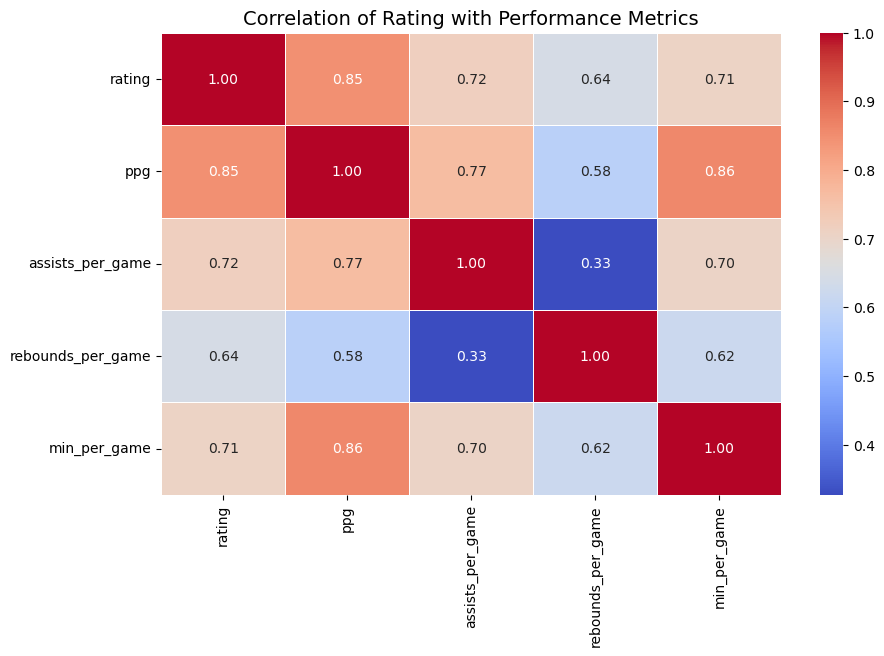

In [123]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=.5)


plt.title('Correlation of Rating with Performance Metrics', fontsize=14)


# Show the plot
plt.show()

### Specific player attributes (height and weight)

In [107]:
X = total_2020_stats[['ppg', 'assists_per_game', 'rebounds_per_game', 'height', 'weight']]
y = total_2020_stats['rating']


X = sm.add_constant(X)

# Fit the regression model
height_weight = sm.OLS(y, X).fit()


height_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     339.0
Date:                Tue, 10 Dec 2024   Prob (F-statistic):          1.44e-150
Time:                        17:34:54   Log-Likelihood:                -1153.2
No. Observations:                 459   AIC:                             2318.
Df Residuals:                     453   BIC:                             2343.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                49.1879      5.150      9.550      0.000      39.066      59.310
ppg                   0.4753      0.036     13.079      0.000       0.404       0.547
assists_per_game      1.0149      0.119      8.509      0.000       0.780       1.249
rebounds_per_game     0.3798      0.090      4.226      0.000       0.203       0.556
height                0.1608      0.077      2.101      0.036       0.010       0.311
weight                0.0293      0.009      3.165      0.002       0.011       0.048
==============================================================================
Omnibus:                       10.219   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               17.516
Skew:                           0.072   Prob(JB):                     0.000157
Kurtosis:                       3.946   Cond. No.                     8.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

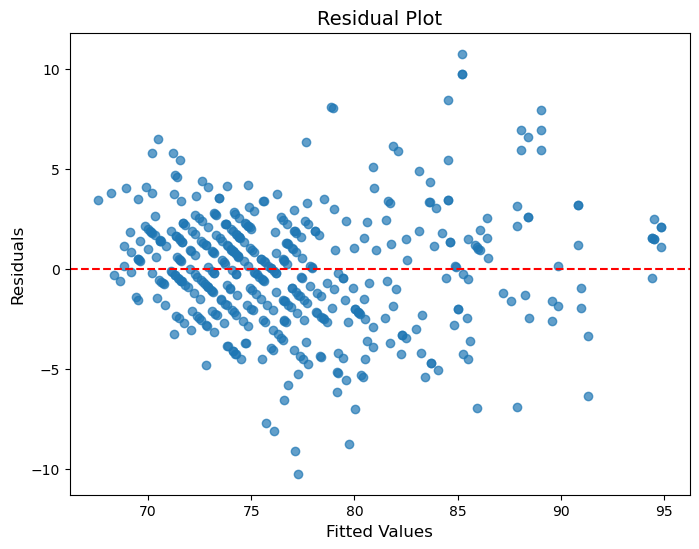

In [125]:
residuals = height_weight.resid

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(height_weight.fittedvalues, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot', fontsize=14)
plt.xlabel('Fitted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.show()

### Correlation between in-game ratings and real-world performance vary by player position

In [39]:
def calculate_correlation_by_position(total_2020_stats):
    correlations = {}
    for position, group in total_2020_stats.groupby('position'):
        
        ppg_corr = group['rating'].corr(group['ppg'])
        assists_corr = group['rating'].corr(group['assists_per_game'])
        rebounds_corr = group['rating'].corr(group['rebounds_per_game'])
        min_corr = group['rating'].corr(group['min_per_game'])
        
       
        correlations[position] = {
            'ppg_corr': ppg_corr,
            'assists_corr': assists_corr,
            'rebounds_corr': rebounds_corr,
            'min_corr': min_corr
        }
    return correlations


correlations = calculate_correlation_by_position(total_2020_stats)





in_game_real_world_corr = pd.DataFrame.from_dict(correlations, orient='index')
in_game_real_world_corr

,ppg_corr,assists_corr,rebounds_corr,min_corr
C,0.874060,0.638126,0.842175,0.781161
C-F,0.648273,0.926716,0.445362,0.898596
F,0.810132,0.797406,0.699577,0.669033
F-C,0.943006,0.695915,0.771209,0.840700
F-G,0.954680,0.952742,0.978831,0.420688
G,0.875459,0.797489,0.684030,0.761389
G-F,0.709483,0.851126,0.657624,0.556268


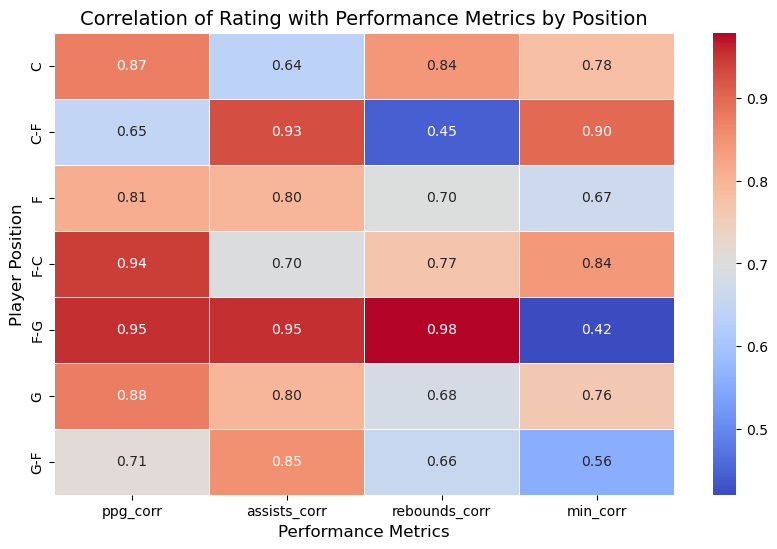

In [105]:
plt.figure(figsize=(10, 6))
sns.heatmap(in_game_real_world_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=.5)


plt.title('Correlation of Rating with Performance Metrics by Position', fontsize=14)
plt.xlabel('Performance Metrics', fontsize=12)
plt.ylabel('Player Position', fontsize=12)

# Show the plot
plt.show()